# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set

# The three models
import decision_tree
import svm_method
import random_forest_method

In [58]:
import pandas_to_latex

In [59]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

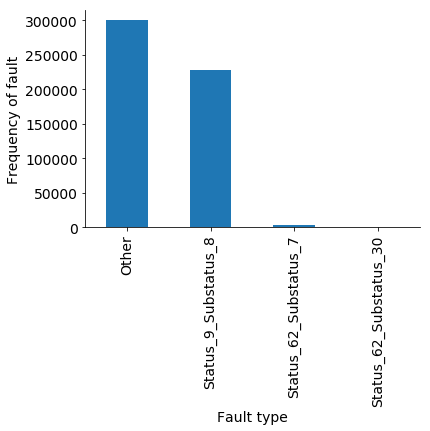

<Figure size 1440x1152 with 0 Axes>

In [60]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [61]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [62]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

In [63]:
print(undersampled_data['Status'].value_counts())

Status_9_Substatus_8      20000
Other                     20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64


# REMOVE THE CELL UNDER; THIS IS JUST FOR TESTING

In [64]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")

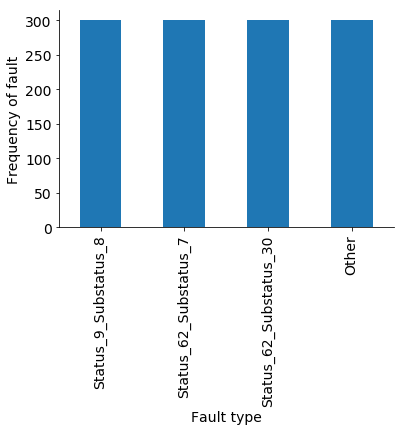

<Figure size 1440x1152 with 0 Axes>

In [65]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [66]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,09-12-2018 21:55:00,1.0,4.700000,10.410000,340.0,138.0,12.0,21.0,24.0,17.0,...,43.0,31.0,35.0,3.0,13.0,18.0,37.0,1.000000,341.000000,Other
1,15-12-2018 01:47:00,-4.2,2.400000,7.780000,99.0,0.0,4.0,15.0,15.0,10.0,...,24.0,20.0,20.0,-1.0,3.0,15.0,22.0,59.270000,94.800003,Status_9_Substatus_8
2,23-03-2019 00:03:00,-1.7,17.200001,20.629999,230.0,2080.0,26.0,43.0,32.0,19.0,...,45.0,19.0,28.0,6.0,-14.0,32.0,70.0,16.790001,228.300003,Other
3,06-09-2019 12:25:30,13.7,3.600000,7.480000,286.0,27.0,21.0,29.0,29.0,24.0,...,51.0,37.0,39.0,12.0,16.0,20.0,29.0,1.000000,299.700012,Status_9_Substatus_8
4,30-09-2018 16:09:00,26.4,4.100000,0.000000,268.0,0.0,10.0,17.0,16.0,19.0,...,14.0,22.0,20.0,6.0,13.0,18.0,31.0,92.019997,294.399994,Status_62_Substatus_30


In [67]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(1200,)

In [68]:
y.value_counts()

Status_9_Substatus_8      300
Status_62_Substatus_7     300
Status_62_Substatus_30    300
Other                     300
Name: Status, dtype: int64

## SMOTE (BEFORE RANDOM FOREST)

In [69]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_smote ,y_smote = sm.fit_resample(X, y)

'''
X_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)
'''

'\nX_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)\n'

## Random forest and feature importance

In [70]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=10, random_state=12)

# Smote is on the cross validation
df_rf, y_true, y_pred = performance_measure.cross_validate_model(rf,X,y,smote=True)
performance_measure.confusion_matrix(y_true,y_pred)

# rf = random_forest_method.get_rf_model(pd.DataFrame(X_train_smote1,columns=X_train.columns), pd.DataFrame(X_test_smote1,columns=X_train.columns), y_train_smote1, y_test_smote1)
# rf1 = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

# Combine training and test data for cross validation:

rf.fit(X_smote,y_smote)

columns = X.columns
feature_importances = random_forest_method.get_feature_importances(rf, columns)
feature_importances.head()

The avg accc is:  0.8574999999999999

\begin{tabular}{lll}
\toprule
precision &  recall &    f1\_avg \\
\midrule
 0.860541 &  0.8575 &  0.855245 \\
\bottomrule
\end{tabular}



,importance
Log-T-Raw-Rectifier1HeatSink,0.083832
Log-T-Raw-TransformerTemperature,0.077647
Log-T-Raw-Rotor2Temperature,0.062211
Log-T-Raw-Stator1Temperature,0.053390
ActivePower,0.053329


In [71]:
pandas_to_latex.df_to_latex(feature_importances.head())


\begin{tabular}{r}
\toprule
 importance \\
\midrule
   0.083832 \\
   0.077647 \\
   0.062211 \\
   0.053390 \\
   0.053329 \\
\bottomrule
\end{tabular}



## SVM

### Split data for LIME

In [72]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)
columns_for_data = X_train.columns
y_train.value_counts()
y_test.value_counts()

Status_9_Substatus_8      99
Status_62_Substatus_7     99
Status_62_Substatus_30    99
Other                     99
Name: Status, dtype: int64

### Scale data set for SVM

In [73]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

# Scale the whole dataset first
scaler_whole  = MinMaxScaler()
X_scaled = scaler_whole.fit_transform(X)

# Scale the SMOTE data set:
scaler_whole_smote  = MinMaxScaler()
X_scaled_oversampled = scaler_whole.fit_transform(X_scaled)

# Scale the train and test, for use with LIME

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.columns = columns_for_data
X_train_scaled_df.head()

(804, 34)
(396, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.671412,0.158904,0.523481,0.376045,0.000000,0.176471,0.301587,0.333333,0.131579,0.153846,...,0.974359,0.9875,0.372093,0.44,0.195652,0.375000,0.466667,0.090909,0.043322,0.479282
1,0.798339,0.090411,0.327445,0.579387,0.010879,0.509804,0.507937,0.568627,0.578947,0.589744,...,0.551282,0.5500,0.720930,0.54,0.434783,0.541667,0.333333,0.285714,0.000000,0.721225
2,0.678134,0.243836,0.778975,0.362117,0.342259,0.215686,0.476190,0.568627,0.342105,0.410256,...,0.769231,0.7000,0.627907,0.92,0.260870,0.500000,0.244444,0.246753,0.054425,0.471685
3,0.695532,0.389041,0.921586,0.693593,0.946862,0.588235,0.777778,0.666667,0.447368,0.512821,...,0.653846,0.7125,0.395349,0.66,0.478261,0.791667,0.711111,0.857143,0.102101,0.755755
4,0.661922,0.334247,0.853942,0.629526,0.771548,0.705882,0.825397,0.509804,0.263158,0.358974,...,0.705128,0.6625,0.325581,0.62,0.500000,0.777778,0.688889,0.740260,0.000000,0.683241


In [74]:
# Printing the 5 first columns and 5 first rows for the thesis
def head_row_col(dataframe):
    print_df = dataframe.head().iloc[:,[1,2,3,4,5]].copy()
    print_df["..."]="..."
    return print_df

# The scaled set looks like this
pandas_to_latex.df_to_latex(head_row_col(X_train_scaled_df))


\begin{tabular}{rrrrrl}
\toprule
 WindSpeed &  RotorSpeed &  NacelleDirection &  ActivePower &  Spinner-Temperature &  ... \\
\midrule
  0.158904 &    0.523481 &          0.376045 &     0.000000 &             0.176471 &  ... \\
  0.090411 &    0.327445 &          0.579387 &     0.010879 &             0.509804 &  ... \\
  0.243836 &    0.778975 &          0.362117 &     0.342259 &             0.215686 &  ... \\
  0.389041 &    0.921586 &          0.693593 &     0.946862 &             0.588235 &  ... \\
  0.334247 &    0.853942 &          0.629526 &     0.771548 &             0.705882 &  ... \\
\bottomrule
\end{tabular}



## SMOTE for training and test data

In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote, y_test_smote = sm.fit_resample(X_test_scaled, y_test)

## SVM method

In [76]:
from sklearn.svm import SVC

### BALANCED SVM

The avg accc is:  0.48999999999999994

\begin{tabular}{lll}
\toprule
precision & recall &    f1\_avg \\
\midrule
 0.527723 &   0.49 &  0.439948 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.10666667 0.22       0.15333333 0.52      ]
 [0.03       0.26333333 0.1        0.60666667]
 [0.02333333 0.06       0.73666667 0.18      ]
 [0.01       0.11333333 0.02333333 0.85333333]]


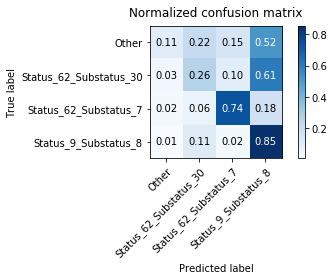

In [77]:
# Balanced
svm_balanced = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')
df_svm_balanced, y_true_svm_balanced, y_pred_svm_balanced = performance_measure.cross_validate_model(svm_balanced,X_scaled,y)
performance_measure.plot_confusion_matrix(y_true_svm_balanced,y_pred_svm_balanced,normalize=True)

# svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

The avg accc is:  0.48999999999999994

\begin{tabular}{lll}
\toprule
precision & recall &    f1\_avg \\
\midrule
 0.527723 &   0.49 &  0.439948 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.10666667 0.22       0.15333333 0.52      ]
 [0.03       0.26333333 0.1        0.60666667]
 [0.02333333 0.06       0.73666667 0.18      ]
 [0.01       0.11333333 0.02333333 0.85333333]]


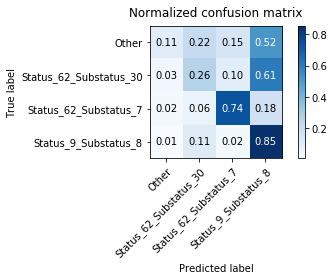

In [78]:
# Unbalanced
svm_unbalanced = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced, y_true_svm_unbalanced, y_pred_svm_unbalanced = performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced,y_pred_svm_unbalanced,normalize=True)

# svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED AND SMOTE SVM (USE THIS RESULT Best results for 62_30)!

The avg accc is:  0.48999999999999994

\begin{tabular}{lll}
\toprule
precision & recall &    f1\_avg \\
\midrule
 0.527723 &   0.49 &  0.439948 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.10666667 0.22       0.15333333 0.52      ]
 [0.03       0.26333333 0.1        0.60666667]
 [0.02333333 0.06       0.73666667 0.18      ]
 [0.01       0.11333333 0.02333333 0.85333333]]


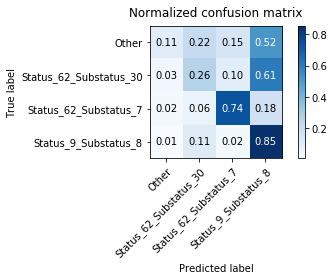

In [79]:
svm_unbalanced_smote = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced_smote, y_true_svm_unbalanced_smote, y_pred_svm_unbalanced_smote = performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced_smote,y_pred_svm_unbalanced_smote,normalize=True)

# svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [80]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(X_test_scaled_smote.shape)
print(y_test.shape)

(804, 34)
(804,)
(396, 34)
(396,)


The avg accc is:  0.48999999999999994

\begin{tabular}{lll}
\toprule
precision & recall &    f1\_avg \\
\midrule
 0.527723 &   0.49 &  0.439948 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.10666667 0.22       0.15333333 0.52      ]
 [0.03       0.26333333 0.1        0.60666667]
 [0.02333333 0.06       0.73666667 0.18      ]
 [0.01       0.11333333 0.02333333 0.85333333]]


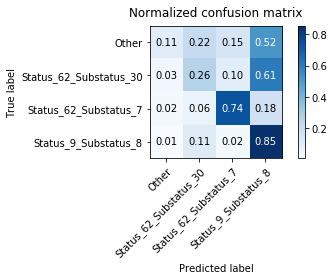

In [81]:
svm_balanced_smote = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')

df_svm_balanced_smote, y_true_svm_balanced_smote, y_pred_svm_balanced_smote = performance_measure.cross_validate_model(svm_balanced_smote,X_scaled_oversampled,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_svm_balanced_smote,y_pred_svm_balanced_smote,normalize=True)

# balanced with smote and undersampling
# svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

## Decision tree model

### Remove the features from the random forest model called rf


In [82]:
# rf_df = pd.DataFrame(feature_importances)
rf_df = feature_importances

rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features

,Selected features for decision tree
0,Log-T-Raw-Rectifier1HeatSink
1,Log-T-Raw-TransformerTemperature
2,Log-T-Raw-Rotor2Temperature
3,Log-T-Raw-Stator1Temperature
4,ActivePower
5,Log-T-Raw-Rectifier2HeatSink


### Convert the selected DT variables to LATEX

In [83]:
# Print to latex
pandas_to_latex.df_to_latex(df_selected_features)


\begin{tabular}{l}
\toprule
Selected features for decision tree \\
\midrule
       Log-T-Raw-Rectifier1HeatSink \\
   Log-T-Raw-TransformerTemperature \\
        Log-T-Raw-Rotor2Temperature \\
       Log-T-Raw-Stator1Temperature \\
                        ActivePower \\
       Log-T-Raw-Rectifier2HeatSink \\
\bottomrule
\end{tabular}



In [84]:
# Make the feature names more readable by removing "LOG-" etc.
shorter_feature_names = []
for i, s in enumerate(list_of_features):
    split = s.split("Log-T-Raw-")
    print(split)
    if (len(split)>1):
        shorter_feature_names.append(split[1])
    else:
        shorter_feature_names.append(split[0])
shorter_feature_names

['', 'Rectifier1HeatSink']
['', 'TransformerTemperature']
['', 'Rotor2Temperature']
['', 'Stator1Temperature']
['ActivePower']
['', 'Rectifier2HeatSink']


['Rectifier1HeatSink',
 'TransformerTemperature',
 'Rotor2Temperature',
 'Stator1Temperature',
 'ActivePower',
 'Rectifier2HeatSink']

### Evaluate Decision tree model

#### Setting depth for tree


In [85]:
from sklearn.tree import DecisionTreeClassifier
DEPTH = 3

The avg accc is:  0.6266666666666666

\begin{tabular}{lll}
\toprule
precision &    recall &    f1\_avg \\
\midrule
 0.686541 &  0.626667 &  0.633125 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.51666667 0.42       0.05666667 0.00666667]
 [0.29666667 0.67333333 0.02       0.01      ]
 [0.14       0.00666667 0.80666667 0.04666667]
 [0.09666667 0.37333333 0.02       0.51      ]]


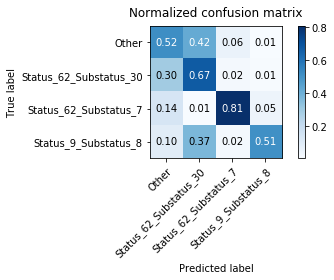

In [86]:
X_dt = X[include_features.tolist()]
clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = DEPTH)

df_dt, y_true_dt, y_pred_dt = performance_measure.cross_validate_model(clf_df,X_dt,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_dt,y_pred_dt,normalize=True)


In [87]:
import numpy as np

# Training the DT with the SMOTE data (all of it)

X_smote_with_names = (pd.DataFrame(X_smote))
X_smote_with_names.columns = columns_for_data


# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]

# Only including the features in from the Random Forest feature imporances
X_smote_filtered = X_smote_with_names[include_features.tolist()]

# Printing df
X_smote_filtered.head()

,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-TransformerTemperature,Log-T-Raw-Rotor2Temperature,Log-T-Raw-Stator1Temperature,ActivePower,Log-T-Raw-Rectifier2HeatSink
0,45.0,37.0,28.0,31.0,138.0,43.0
1,23.0,22.0,11.0,15.0,0.0,24.0
2,53.0,70.0,61.0,85.0,2080.0,45.0
3,49.0,29.0,38.0,46.0,27.0,51.0
4,14.0,31.0,25.0,35.0,0.0,14.0


In [88]:
col_rename_dict = {i:j for i,j in zip(X_smote_filtered.columns,shorter_feature_names)}
X_smote_filtered.rename(columns=col_rename_dict, inplace=True)

# X_test_scaled_removed.rename(columns={include_features : shorter_feature_names})
X_smote_filtered.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Rectifier1HeatSink,TransformerTemperature,Rotor2Temperature,Stator1Temperature,ActivePower,Rectifier2HeatSink
0,45.0,37.0,28.0,31.0,138.0,43.0
1,23.0,22.0,11.0,15.0,0.0,24.0
2,53.0,70.0,61.0,85.0,2080.0,45.0
3,49.0,29.0,38.0,46.0,27.0,51.0
4,14.0,31.0,25.0,35.0,0.0,14.0


### Training the DT

In [89]:
# Train DT on these features and print it out:

X_dt = X[include_features.tolist()]
clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = DEPTH)
clf_df.fit(X_smote_filtered,y_smote)


# dt_depth3 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,3)
# dt_depth2 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12, splitter='best')

In [90]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

def save_tree(dt,name):
    dot_data = tree.export_graphviz(dt,
                                    feature_names=X_smote_filtered.columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('powderblue', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    # Exporting image to current directory
    graph.write_png('../Data_Plots/decision_trees/{}.png'.format(name))

In [91]:
save_tree(clf_df,"depth3")
# save_tree(dt_depth3,"depth3")